In [4]:
import sys

import altair as alt
import networkx as nx
from functools import partial

".." not in sys.path and sys.path.append("..")
from alph import alph, layout

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

Source:  
http://www-personal.umich.edu/~mejn/netdata/  
https://www.kaggle.com/datasets/mashazhil/social-network-of-dolphins-in-new-zealand

In [5]:
G = nx.read_gml("./dolphins.gml", label="id")
nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness_centrality")

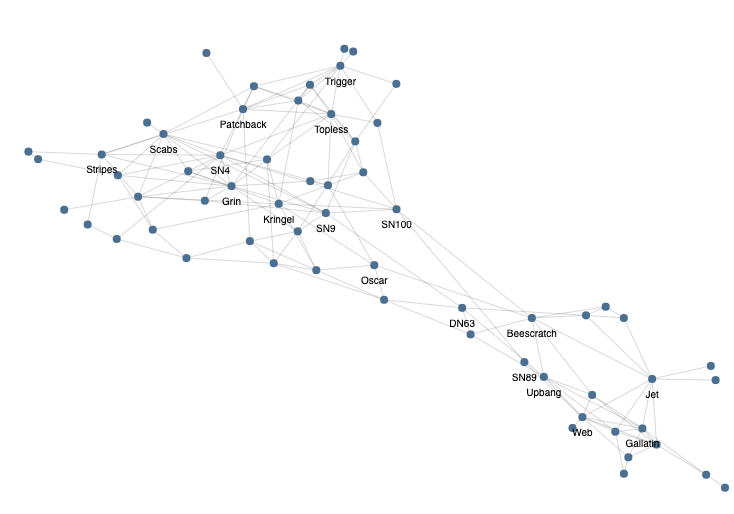

In [6]:
alph(
    G,
    layout_fn=partial(
        # nx.spring_layout, k=.2, iterations=1000, seed=123
        layout.force_atlas, strongGravityMode=False, gravity=2, seed=123
        #layout.force_atlas_sknet, n_iter=100, gravity_factor=0.01, repulsive_factor=0.03, init_seed=123
    ),
    node_args=dict(
        size=alt.value(8**2),
        fill=alt.value("#4b6f91"),
        halo_offset=None,
        tooltip_attrs=["label"],
        label_attr=alt.condition(
            (alt.datum.degree_centrality > 0.14) | (alt.datum.betweenness_centrality > 0.05),
            "label",
            alt.value("")
        ),
    ),
    edge_args=dict(
        color="black",
        opacity=0.3,
        strokeWidth=alt.value(0.5),
    ),
).configure_view(strokeWidth=0).properties(width=720, height=500)